# **BRAZIL FIRES PREDICTION**

![](https://www.fodors.com/wp-content/uploads/2020/11/brazil-fire-1.jpg)

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [2]:
data= pd.read_csv('D:/ML/Brazil Fires Prediction/Dataset/amazon.csv', encoding='latin-1')

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
data.value_counts

<bound method DataFrame.value_counts of       year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]>

In [7]:
data.shape

(6454, 5)

In [8]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [9]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

**Checking Null Values**



In [10]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [12]:
data.drop_duplicates(inplace = True)


In [13]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [14]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [16]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [17]:
data

,year,state,month,number,date
0,1998,0,4,0.0,0
1,1999,0,4,0.0,1
2,2000,0,4,0.0,2
3,2001,0,4,0.0,3
4,2002,0,4,0.0,4
...,...,...,...,...,...
6449,2012,22,2,128.0,14
6450,2013,22,2,85.0,15
6451,2014,22,2,223.0,16
6452,2015,22,2,373.0,17


# **Exploratory Data Analysis**

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**



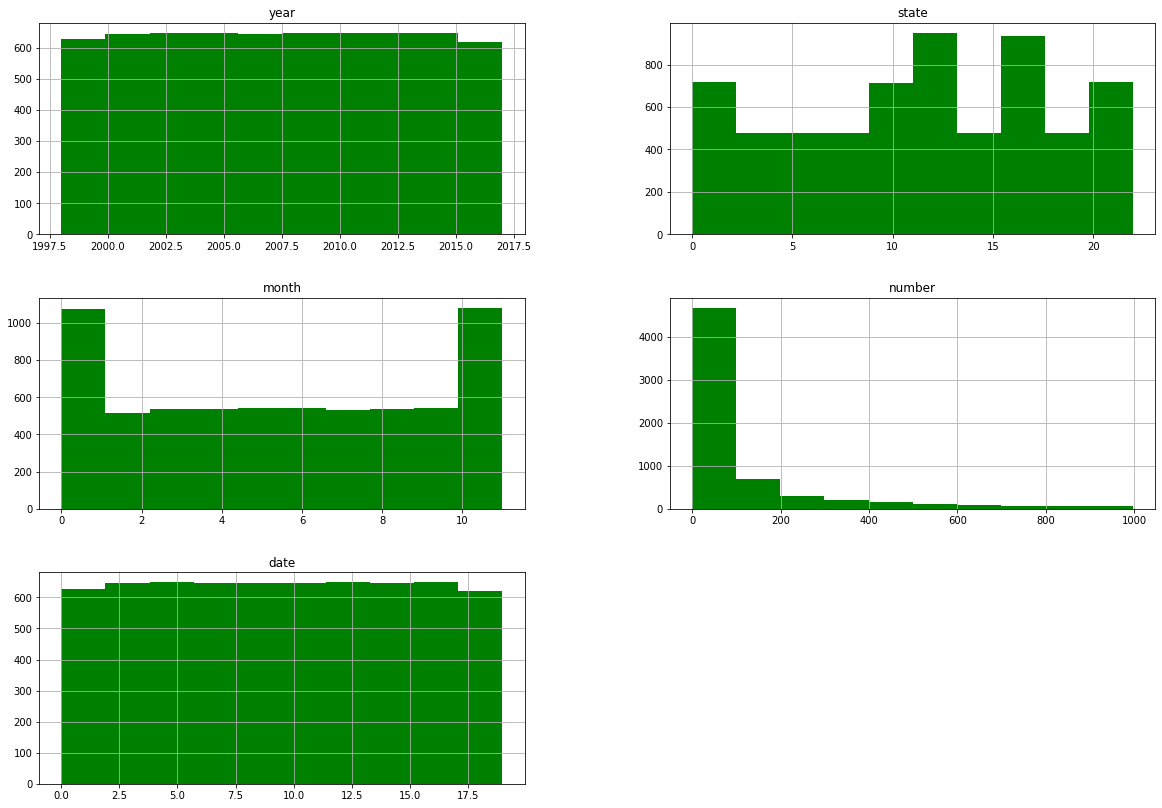

In [18]:
data.hist(figsize=(20,14),color='g')
plt.show()


![](https://hwnews.in/wp-content/uploads/2019/08/Amazon-forest-fire-960x540.jpg)

In [19]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



<AxesSubplot:xlabel='year', ylabel='month'>

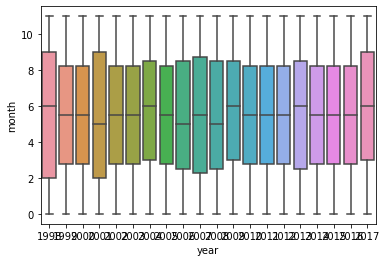

In [20]:
sns.boxplot(x='year',y='month',data=data)


**STRIPPLOT**

**A strip plot is a graphical data anlysis technique for summarizing a univariate data set. ... The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).**



<AxesSubplot:xlabel='year', ylabel='state'>

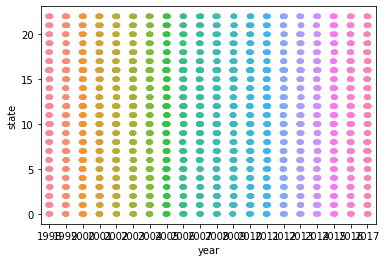

In [21]:
sns.stripplot(x='year',y='state',data=data)

**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.**



<AxesSubplot:xlabel='year', ylabel='number'>

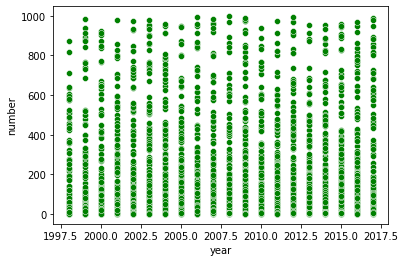

In [22]:
sns.scatterplot(x='year',y='number',data=data,color='g')

**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**



<AxesSubplot:xlabel='year', ylabel='number'>

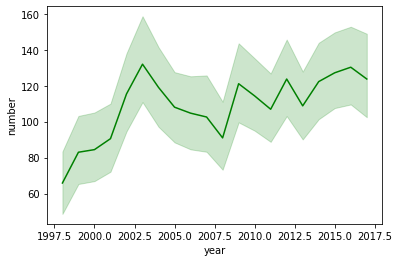

In [23]:
sns.lineplot(x='year',y='number',data=data,color='g')

![](https://api.time.com/wp-content/uploads/2019/08/sebastian-liste-amazon-fires-brazil-3.jpg)

In [24]:
data.corr()

,year,state,month,number,date
year,1.000000,0.002014,0.005818,0.062600,1.000000
state,0.002014,1.000000,0.000460,0.021142,0.002014
month,0.005818,0.000460,1.000000,0.051120,0.005818
number,0.062600,0.021142,0.051120,1.000000,0.062600
date,1.000000,0.002014,0.005818,0.062600,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**

<AxesSubplot:>

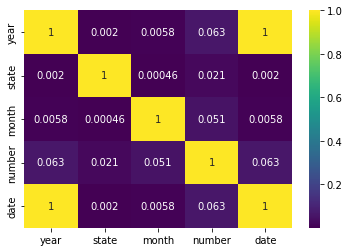

In [25]:

sns.heatmap(data.corr(), annot = True, cmap = 'viridis')


**PAIRPLOT**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**


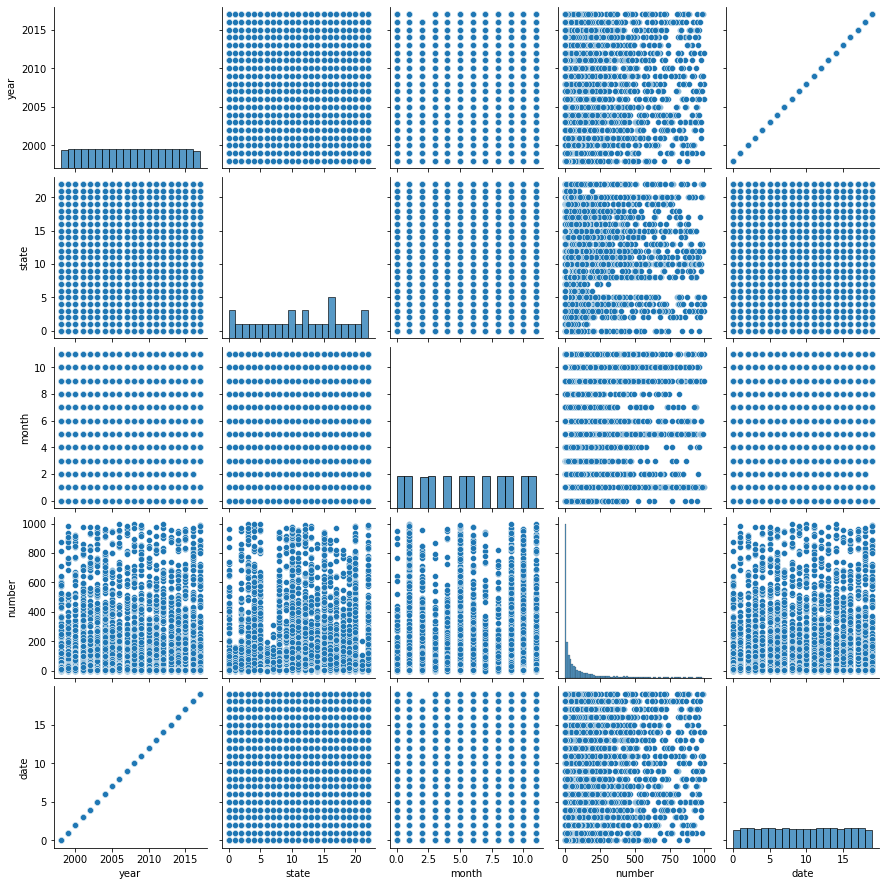

In [26]:
sns.pairplot(data=data)


**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**



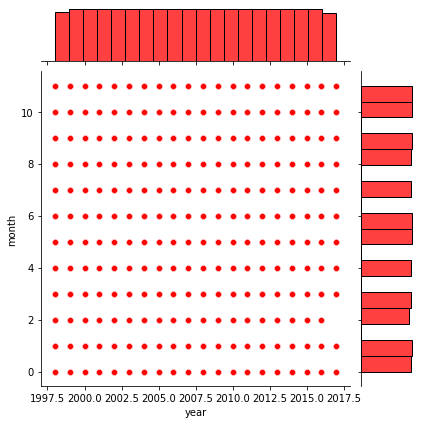

In [27]:
sns.jointplot(x='year',y='month',data=data,color='r')

**REGPLOT**

**This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.**



<AxesSubplot:xlabel='year', ylabel='number'>

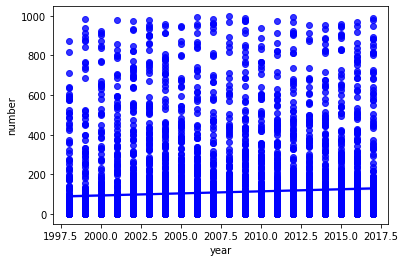

In [28]:
sns.regplot(x='year',y='number',data=data,color='b')

**KDE PLOT (DENSITY PLOT)**

**KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.**



<AxesSubplot:xlabel='year', ylabel='state'>

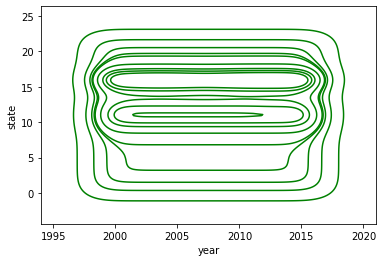

In [29]:
sns.kdeplot(x='year',y='state',data=data,color='g')

**BARPLOT**

**A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.**

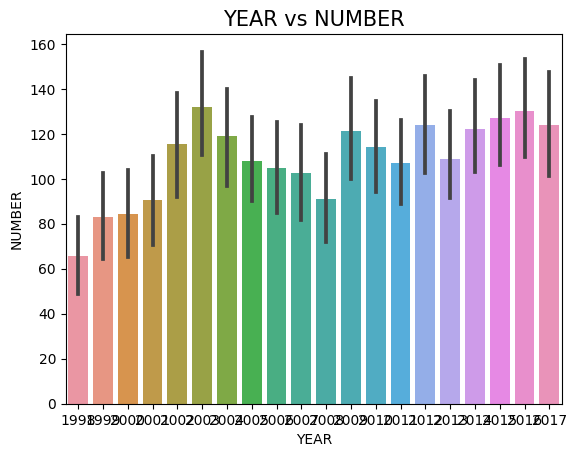

In [30]:
plt.style.use("default")
sns.barplot(x="year", y="number",data=data)
plt.title("YEAR vs NUMBER",fontsize=15)
plt.xlabel("YEAR")
plt.ylabel("NUMBER")
plt.show()


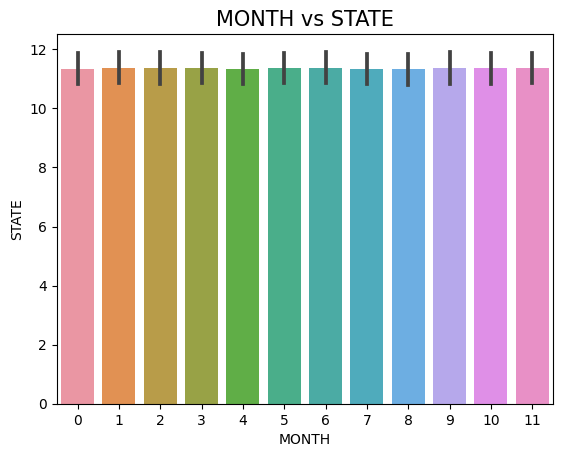

In [31]:
plt.style.use("default")
sns.barplot(x="month", y="state",data=data)
plt.title("MONTH vs STATE",fontsize=15)
plt.xlabel("MONTH")
plt.ylabel("STATE")
plt.show()


![](https://i.guim.co.uk/img/media/318697f53f1aba1c90b2d95e908e217314e37e7e/0_164_2480_1489/500.jpg?quality=85&auto=format&fit=max&s=86e302106077e9ac3c6da4485fcc629f)

**DATA PREPROCESSING**

In [32]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [33]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [36]:
data

,year,state,month,number,date
0,1998,0,4,0.0,0
1,1999,0,4,0.0,1
2,2000,0,4,0.0,2
3,2001,0,4,0.0,3
4,2002,0,4,0.0,4
...,...,...,...,...,...
6449,2012,22,2,128.0,14
6450,2013,22,2,85.0,15
6451,2014,22,2,223.0,16
6452,2015,22,2,373.0,17


**TRAINING AND TESTING DATA**

In [37]:
y=data['year']
x=data.drop('year',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [38]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))


1285
5137
1285
5137


# MODELS

**1. KNeighborsClassifier**

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**



In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

        1998       0.45      0.57      0.50        51
        1999       0.28      0.29      0.29        72
        2000       0.26      0.32      0.29        59
        2001       0.27      0.32      0.29        63
        2002       0.16      0.15      0.16        65
        2003       0.20      0.26      0.23        65
        2004       0.14      0.11      0.13        70
        2005       0.28      0.23      0.25        66
        2006       0.16      0.21      0.18        57
        2007       0.22      0.24      0.23        62
        2008       0.27      0.29      0.28        66
        2009       0.13      0.14      0.14        56
        2010       0.28      0.30      0.29        66
        2011       0.21      0.20      0.20        60
        2012       0.28      0.21      0.24        73
        2013       0.15      0.16      0.15        58
        2014       0.17      0.20      0.18        66


**2.Naive Bayes** 

**Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.**

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [42]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print(accuracy_score(y_test,y_pred)*100)


Classification Report is:
               precision    recall  f1-score   support

        1998       1.00      1.00      1.00        51
        1999       1.00      1.00      1.00        72
        2000       1.00      1.00      1.00        59
        2001       1.00      1.00      1.00        63
        2002       1.00      1.00      1.00        65
        2003       1.00      1.00      1.00        65
        2004       1.00      1.00      1.00        70
        2005       1.00      1.00      1.00        66
        2006       1.00      1.00      1.00        57
        2007       1.00      1.00      1.00        62
        2008       1.00      1.00      1.00        66
        2009       1.00      1.00      1.00        56
        2010       1.00      1.00      1.00        66
        2011       1.00      1.00      1.00        60
        2012       1.00      1.00      1.00        73
        2013       1.00      1.00      1.00        58
        2014       1.00      1.00      1.00        66


**3. DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [44]:
from sklearn.metrics import classification_report,mean_squared_error
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0

**4.Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [46]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",rfc.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 58  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 57  0  0

**5. AdaBoostClassifier**

**An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [48]:
y_pred=adb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",adb.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 58  0  0  0  0  0  0

**6. Gradient Boosting Classifier**

**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
y_pred=gbc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
print(score)
print("Training Score:\n",gbc.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0

In [51]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
148,2006,2006
1548,2011,2011
3526,2017,2017
5900,2001,2001
3906,1999,1999
...,...,...
4611,2007,2007
2732,2000,2000
1892,2016,2016
3308,1998,1998


**7. XGBClassifier**

**XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.**



In [52]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


[16:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred=xgb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",xgb.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0

**8. ExtraTreesClassifier**

**Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.**



In [54]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [55]:
y_pred=etc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
print("Training Score:\n",etc.score(x_train,y_train)*100)


[[51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0

In [56]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
148,2006,2006
1548,2011,2011
3526,2017,2017
5900,2001,2001
3906,1999,1999
...,...,...
4611,2007,2007
2732,2000,2000
1892,2016,2016
3308,1998,1998


# CONCLUSION:

**So we get a good accuracy and training score of about 100 % using Random Forest Classifier, XG Boost , Gradient Boosting Classifier.**

**The accuracy of other models can be increased by Hypertuning.**

# **Thank you** 